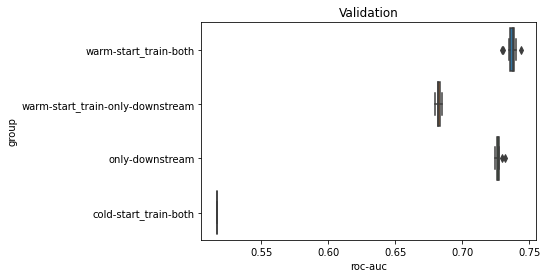

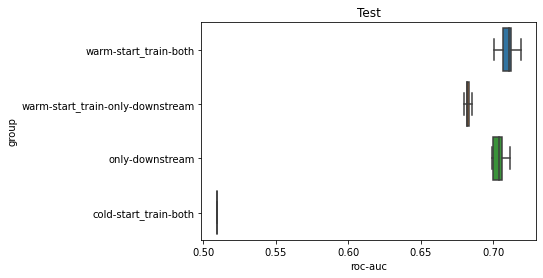

Sample Sizes
warm-start_train-both: 14
warm-start_train-only-downstream: 14
only-downstream: 15
cold-start_train-both: 1


In [5]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# comparisson:
# a: both_stages_being_trained_warm_start
# b: warm start, only downstream being trained
# c: only downsteam

# warm start both stages train
with open('/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V5-different-seeds/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    a = pickle.load(handle)

# warm start, only downstream being trained
with open('/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V6-different-seeds/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    b = pickle.load(handle)

# Only downstream classification
with open('/home/david/Desktop/projects/thesis/downstream_classification/models/AF-V9-different-seeds/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    c = pickle.load(handle)

# cold start both stages train
with open('/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V7-different-seeds/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    d = pickle.load(handle)

# validation
res_df_val = pd.concat(
    [
        pd.DataFrame({
            'roc-auc': a['validation-roc-auc'],
            'group': ['warm-start_train-both']*len(a['validation-roc-auc'])
            }),
        pd.DataFrame({
            'roc-auc': b['validation-roc-auc'],
            'group': ['warm-start_train-only-downstream']*len(b['validation-roc-auc'])
            }),
        pd.DataFrame({
            'roc-auc': c['validation-roc-auc'],
            'group': ['only-downstream']*len(c['validation-roc-auc'])
            }),
        pd.DataFrame({
            'roc-auc': d['validation-roc-auc'],
            'group': ['cold-start_train-both']*len(d['validation-roc-auc'])
            }),
    ],
    axis=0, ignore_index=True
)

# test
res_df_test = pd.concat(
    [
        pd.DataFrame({
            'roc-auc': a['test-roc-auc'],
            'group': ['warm-start_train-both']*len(a['test-roc-auc'])
            }),
        pd.DataFrame({
            'roc-auc': b['validation-roc-auc'],
            'group': ['warm-start_train-only-downstream']*len(b['test-roc-auc'])
            }),
        pd.DataFrame({
            'roc-auc': c['test-roc-auc'],
            'group': ['only-downstream']*len(c['test-roc-auc'])
            }),
        pd.DataFrame({
            'roc-auc': d['test-roc-auc'],
            'group': ['cold-start_train-both']*len(d['test-roc-auc'])
            })
    ],
    axis=0, ignore_index=True
)

sns.boxplot(data = res_df_val, x = 'roc-auc', y='group')
plt.title('Validation')
plt.show()

sns.boxplot(data = res_df_test, x = 'roc-auc', y='group')
plt.title('Test')
plt.show()

len_a = len(a['test-roc-auc'])
len_b = len(b['test-roc-auc'])
len_c = len(c['test-roc-auc'])
len_d = len(d['test-roc-auc'])

print('Sample Sizes')
print(f'warm-start_train-both: {len_a}')
print(f'warm-start_train-only-downstream: {len_b}')
print(f'only-downstream: {len_c}')
print(f'cold-start_train-both: {len_d}')

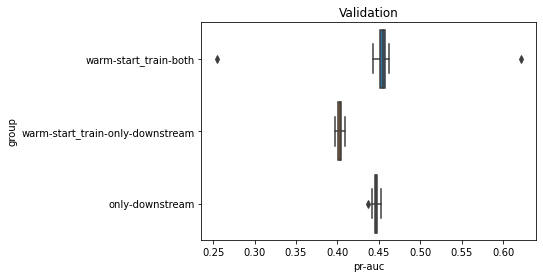

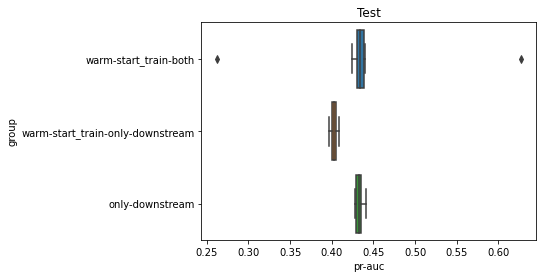

Sample Sizes
warm-start_train-both: 14
warm-start_train-only-downstream: 14
only-downstream: 15
cold-start_train-both: 2


In [7]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# comparisson:
# a: both_stages_being_trained_warm_start
# b: warm start, only downstream being trained
# c: only downsteam

# warm start both stages train
with open('/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V5-different-seeds/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    a = pickle.load(handle)

# warm start, only downstream being trained
with open('/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V6-different-seeds/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    b = pickle.load(handle)

# Only downstream classification
with open('/home/david/Desktop/projects/thesis/downstream_classification/models/AF-V9-different-seeds/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    c = pickle.load(handle)

# cold start both stages train
with open('/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V7-different-seeds/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    d = pickle.load(handle)

# validation
res_df_val = pd.concat(
    [
        pd.DataFrame({
            'pr-auc': a['validation-pr-auc'],
            'group': ['warm-start_train-both']*len(a['validation-pr-auc'])
            }),
        pd.DataFrame({
            'pr-auc': b['validation-pr-auc'],
            'group': ['warm-start_train-only-downstream']*len(b['validation-pr-auc'])
            }),
        pd.DataFrame({
            'pr-auc': c['validation-pr-auc'],
            'group': ['only-downstream']*len(c['validation-pr-auc'])
            }),
        pd.DataFrame({
            'pr-auc': d['validation-pr-auc'],
            'group': ['cold-start_train-both']*len(d['validation-pr-auc'])
            }),
    ],
    axis=0, ignore_index=True
)

# test
res_df_test = pd.concat(
    [
        pd.DataFrame({
            'pr-auc': a['test-pr-auc'],
            'group': ['warm-start_train-both']*len(a['test-pr-auc'])
            }),
        pd.DataFrame({
            'pr-auc': b['validation-pr-auc'],
            'group': ['warm-start_train-only-downstream']*len(b['test-pr-auc'])
            }),
        pd.DataFrame({
            'pr-auc': c['test-pr-auc'],
            'group': ['only-downstream']*len(c['test-pr-auc'])
            }),
        pd.DataFrame({
            'pr-auc': d['test-pr-auc'],
            'group': ['cold-start_train-both']*len(d['test-pr-auc'])
            }),
    ],
    axis=0, ignore_index=True
)

sns.boxplot(data = res_df_val, x = 'pr-auc', y='group')
plt.title('Validation')
plt.show()

sns.boxplot(data = res_df_test, x = 'pr-auc', y='group')
plt.title('Test')
plt.show()

len_a = len(a['test-roc-auc'])
len_b = len(b['test-roc-auc'])
len_c = len(c['test-roc-auc'])
len_d = len(d['test-roc-auc'])

print('Sample Sizes')
print(f'warm-start_train-both: {len_a}')
print(f'warm-start_train-only-downstream: {len_b}')
print(f'only-downstream: {len_c}')
print(f'cold-start_train-both: {len_d}')
